# iNaturalist Lab

In [1]:
import keras
import tensorflow.keras
import os
from os import listdir
import shutil
from random import sample
import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
keras.__version__

2022-03-04 23:26:44.199949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/4.0.5/lib/R/lib::/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server
2022-03-04 23:26:44.199981: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.6.0'

## Data

The data for this project was compiled into `inat` directory using the `lab4-preprocessing.R` RScript. 

In [2]:
base_dir = '/Users/palomacartwright/EDS232-mine/eds232-lab4/inat'

# **2 Species (binary classification) - neural net.** 
Draw from 3.4 🍿 Movies (binary classification). 

You’ll need to pre-process the images to be a consistent shape first though – see 5.2.4 Data preprocessing.

In [3]:
train_dir = os.path.join(base_dir, 'spp2/train')
validation_dir = os.path.join(base_dir, 'spp2/validation')
test_dir = os.path.join(base_dir, 'spp2/test')

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')


Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (4, 150, 150, 3)
labels batch shape: (4,)


## Neural Net Modelling

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-03-04 23:26:45.915626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/4.0.5/lib/R/lib::/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server
2022-03-04 23:26:45.915655: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-04 23:26:45.915674: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (taylor): /proc/driver/nvidia/version does not exist
2022-03-04 23:26:45.915900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [6]:
# optimizing and choosing loss function 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 150, 16)      64        
_________________________________________________________________
flatten (Flatten)            (None, 360000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5760016   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 5,760,097
Trainable params: 5,760,097
Non-trainable params: 0
_________________________________________________________________


## Validation

In [7]:
# Model Fit 

history = model.fit(train_generator,
                    steps_per_epoch=5,
                    epochs=40,
                    validation_data=validation_generator,
                    validation_steps = 5)

Epoch 1/40


2022-03-04 23:26:46.036551: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


5/5 [==============================] - 1s 101ms/step - loss: 30.2629 - accuracy: 0.5500 - val_loss: 1.7414 - val_accuracy: 0.6000
Epoch 2/40
5/5 [==============================] - 0s 63ms/step - loss: 12.3171 - accuracy: 0.7000 - val_loss: 7.9913 - val_accuracy: 0.5000
Epoch 3/40
5/5 [==============================] - 0s 68ms/step - loss: 28.5938 - accuracy: 0.4500 - val_loss: 3.1475 - val_accuracy: 0.7000
Epoch 4/40
5/5 [==============================] - 0s 64ms/step - loss: 10.0752 - accuracy: 0.6500 - val_loss: 14.7706 - val_accuracy: 0.5000
Epoch 5/40
5/5 [==============================] - 0s 68ms/step - loss: 2.3262 - accuracy: 0.8000 - val_loss: 14.2306 - val_accuracy: 0.5000
Epoch 6/40
5/5 [==============================] - 0s 70ms/step - loss: 4.8268 - accuracy: 0.6500 - val_loss: 3.5571 - val_accuracy: 0.7500
Epoch 7/40
5/5 [==============================] - 0s 70ms/step - loss: 0.2129 - accuracy: 0.9500 - val_loss: 9.1087 - val_accuracy: 0.6000
Epoch 8/40
5/5 [===============

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

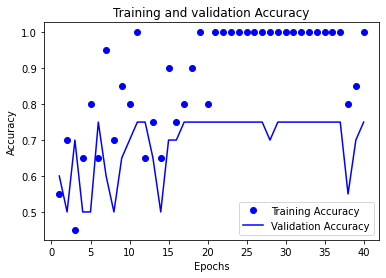

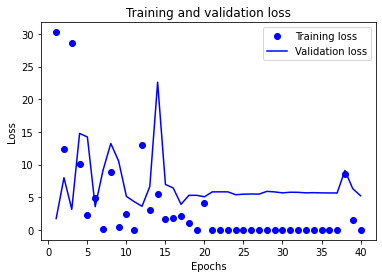

In [10]:
# Plots
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size = (150, 150), 
        batch_size = 4, 
        class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 5)
print("test_acc:", test_acc)
print("test_loss:", test_loss)

Found 20 images belonging to 2 classes.
test_acc: 0.699999988079071
test_loss: 4.347499370574951


/opt/python/3.7.7/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


## **2 Species (binary classification) - convolutional neural net.**


## Build the Convolutional Neural Net Model

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compile the Model

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [15]:
history_2 = model.fit(train_generator,
                   steps_per_epoch = 5,
                   epochs = 40,
                   validation_data = validation_generator, 
                   validation_steps = 5)

Epoch 1/40
5/5 [==============================] - 1s 129ms/step - loss: 0.6435 - acc: 0.6500 - val_loss: 0.7936 - val_acc: 0.5000
Epoch 2/40
5/5 [==============================] - 0s 86ms/step - loss: 0.6781 - acc: 0.6000 - val_loss: 0.6898 - val_acc: 0.5000
Epoch 3/40
5/5 [==============================] - 1s 133ms/step - loss: 0.6737 - acc: 0.5500 - val_loss: 0.6560 - val_acc: 0.5000
Epoch 4/40
5/5 [==============================] - 1s 110ms/step - loss: 0.6593 - acc: 0.6500 - val_loss: 0.6717 - val_acc: 0.5000
Epoch 5/40
5/5 [==============================] - 0s 84ms/step - loss: 0.5843 - acc: 0.8000 - val_loss: 0.7042 - val_acc: 0.5000
Epoch 6/40
5/5 [==============================] - 0s 73ms/step - loss: 0.5085 - acc: 0.8500 - val_loss: 0.5690 - val_acc: 0.6500
Epoch 7/40
5/5 [==============================] - 0s 73ms/step - loss: 0.6273 - acc: 0.6000 - val_loss: 0.5436 - val_acc: 0.6500
Epoch 8/40
5/5 [==============================] - 0s 85ms/step - loss: 0.3995 - acc: 0.8500 - 

### Accuracy and Loss 

In [16]:
acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_2 = range(len(acc_2))

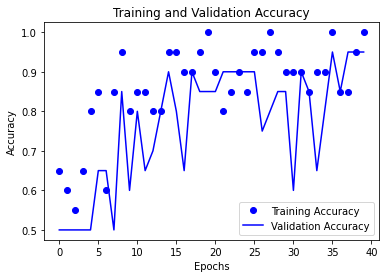

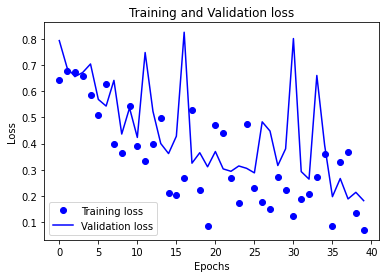

In [17]:
# Plots
plt.plot(epochs_2, acc_2, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs_2, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 20 images belonging to 2 classes.
test acc: 0.8999999761581421
test loss: 0.1899777352809906


# Comparison of the results for 2-Species Analysis

The test accuracy for the convolutional neural network is higher than that of the standard neiral network. The convolutional neural net also has lower loss than the other model. These combined means that there are less errors which occur less frequently meaning that the convolutional neural network is performing better than the standard neural network. 

## **10 Species (multi-class classification) - neural net.** 
Draw from 3.5 📰 Newswires (multi-class classification).

In [19]:
train_dir = os.path.join(base_dir, 'spp10/train')
validation_dir = os.path.join(base_dir, 'spp10/validation')
test_dir = os.path.join(base_dir, 'spp10/test')

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 300 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (4, 150, 150, 3)
labels batch shape: (4, 10)


## Building our Model

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150, 150, 64)      256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440000)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                92160064  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 92,160,970
Trainable params: 92,160,970
Non-trainable params: 0
_________________________________________________________________


In [25]:
# model fit
history_3 = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/40
5/5 [==============================] - 2s 365ms/step - loss: 160.7000 - accuracy: 0.0500 - val_loss: 72.0703 - val_accuracy: 0.0500
Epoch 2/40
5/5 [==============================] - 2s 361ms/step - loss: 37.3083 - accuracy: 0.2000 - val_loss: 73.8625 - val_accuracy: 0.1000
Epoch 3/40
5/5 [==============================] - 2s 355ms/step - loss: 47.1657 - accuracy: 0.1500 - val_loss: 29.3188 - val_accuracy: 0.1000
Epoch 4/40
5/5 [==============================] - 2s 331ms/step - loss: 21.4354 - accuracy: 0.0500 - val_loss: 32.4595 - val_accuracy: 0.2000
Epoch 5/40
5/5 [==============================] - 2s 339ms/step - loss: 24.5462 - accuracy: 0.1500 - val_loss: 20.2396 - val_accuracy: 0.1000
Epoch 6/40
5/5 [==============================] - 2s 340ms/step - loss: 19.6183 - accuracy: 0.1000 - val_loss: 21.1924 - val_accuracy: 0.0500
Epoch 7/40
5/5 [==============================] - 2s 331ms/step - loss: 14.5998 - accuracy: 0.1500 - val_loss: 10.4799 - val_accuracy: 0.2000
Epoch

In [26]:
history_dict_3 = history_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc_3 = history_3.history['accuracy']
val_acc_3 = history_3.history['val_accuracy']
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs_3 = range(1, len(acc_3) + 1)

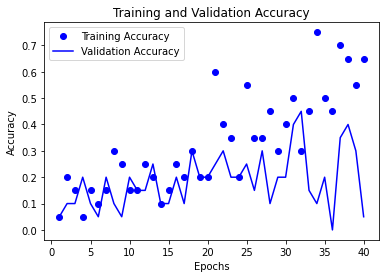

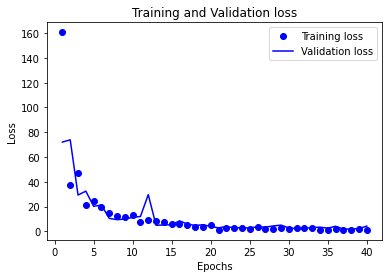

In [28]:
# Plots
plt.plot(epochs_3, acc_3, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs_3, val_acc_3, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs_3, loss_3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_3, val_loss_3, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 10 classes.
test acc: 0.20000000298023224
test loss: 4.216289520263672


## **10 Species (multi-class classification) - convolutional neural net.** 
Draw from dogs vs cats example and update necessary values to go from binary to mult-class classification.

In [30]:
# Build convolutional neural net model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 512)      

In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/40
5/5 [==============================] - 1s 172ms/step - loss: 6.3571 - accuracy: 0.0500 - val_loss: 2.3679 - val_accuracy: 0.1000
Epoch 2/40
5/5 [==============================] - 1s 124ms/step - loss: 2.3471 - accuracy: 0.1500 - val_loss: 2.3598 - val_accuracy: 0.1500
Epoch 3/40
5/5 [==============================] - 1s 150ms/step - loss: 2.2375 - accuracy: 0.1500 - val_loss: 2.4888 - val_accuracy: 0.0500
Epoch 4/40
5/5 [==============================] - 1s 127ms/step - loss: 2.3881 - accuracy: 0.0500 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/40
5/5 [==============================] - 1s 104ms/step - loss: 2.2903 - accuracy: 0.1500 - val_loss: 2.2783 - val_accuracy: 0.2000
Epoch 6/40
5/5 [==============================] - 1s 117ms/step - loss: 2.2330 - accuracy: 0.2000 - val_loss: 2.8950 - val_accuracy: 0.1500
Epoch 7/40
5/5 [==============================] - 1s 103ms/step - loss: 2.4431 - accuracy: 0.1000 - val_loss: 2.2969 - val_accuracy: 0.0500
Epoch 8/40
5/5 [====

In [33]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

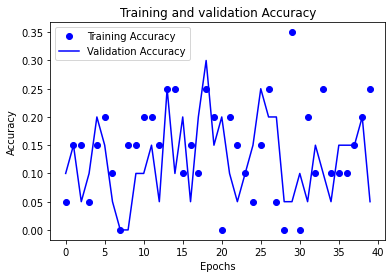

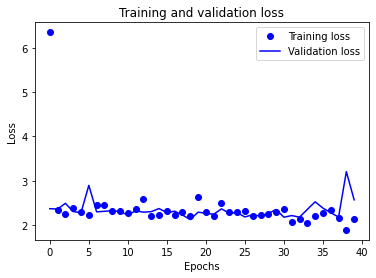

In [35]:
# Plots
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 10 classes.
test acc: 0.05000000074505806
test loss: 2.411633253097534


## Comparing both 10 species models 

The test accuracy was smaller for the convolutional neural network than for the regular neural network. This could be due to the small sample size that the model is training on. The loss for the convolutional neural network was lower than the regular neural netowrk however. 